# Приложение Procrastinate Pro+

# Описание проекта
Я — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Моя задача — разобраться в причинах и помочь компании выйти в плюс.

#### Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

#### Мне предстоит изучить:
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

# Шаг 1. Загрузим данные и подготовьте их к анализу

In [1]:
# Выгружаю все необходимые мне для работы библиотеки:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
visits = pd.read_csv('visits_info_short.csv')
orders = pd.read_csv('orders_info_short.csv')
costs = pd.read_csv('costs_info_short.csv')

display(visits.head())
visits.info()

display(orders.head())
orders.info()

display(costs.head())
costs.info()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Повезло что нет пропусков...
1. Необходимо все привести к нижнему регистру
2. Привести все к виду змеиного регистра
3. Обработать столбцы со временем
4. Проверить данные на наличие дубликатов
5. Столбец Revenue в таблице orders я бы перевел в int и округлил до ближайшего целого числа

In [3]:
# Выполняю два первых пункта:

visits = visits.rename(columns={'User Id':'user_id', 'Region':'region',
                               'Device':'device', 'Channel':'channel',
                                'Session Start':'session_start',
                               'Session End':'session_end'})
orders = orders.rename(columns={'User Id':'user_id', 'Event Dt': 'event_dt',
                               'Revenue':'revenue'})
costs = costs.rename(columns={'Channel':'channel'})

print(visits.columns, orders.columns, costs.columns)

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object') Index(['user_id', 'event_dt', 'revenue'], dtype='object') Index(['dt', 'channel', 'costs'], dtype='object')


In [4]:
# Обработываю столбцы со временем, то есть преобразуем их:

visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [5]:
# Проверю данные на наличие дубликатов

print('Количесвто пропусков в visits:', visits.duplicated().sum())
print('Количесвто пропусков в orders:', orders.duplicated().sum())
print('Количесвто пропусков в costs:', costs.duplicated().sum())

print('Количесвто пропусков по столбцам в visits:', visits.isna().sum())
print('Количесвто пропусков по столбцам в orders:', orders.isna().sum())
print('Количесвто пропусков по столбцам в costs:', costs.isna().sum())

Количесвто пропусков в visits: 0
Количесвто пропусков в orders: 0
Количесвто пропусков в costs: 0
Количесвто пропусков по столбцам в visits: user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64
Количесвто пропусков по столбцам в orders: user_id     0
event_dt    0
revenue     0
dtype: int64
Количесвто пропусков по столбцам в costs: dt         0
channel    0
costs      0
dtype: int64


In [6]:
# Поработаю со столбцом revenue

orders['revenue'] = np.ceil(orders['revenue'])
orders['revenue'] = orders['revenue'].astype(int)

### Данные готовы для работы

# Шаг 2. Зададим функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Это функции для вычисления значений метрик:
- get_profiles() — для создания профилей пользователей,
- get_retention() — для подсчёта Retention Rate,
- get_conversion() — для подсчёта конверсии,
- get_ltv() — для подсчёта LTV.

А также функции для построения графиков:
- filter_data() — для сглаживания данных,
- plot_retention() — для построения графика Retention Rate,
- plot_conversion() — для построения графика конверсии,
- plot_ltv_roi — для визуализации LTV и ROI.

## Строю функцию get_profiles()

In [7]:
def get_profiles(sessions, orders, ad_costs):

    # нахожу параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # определяю дату первого посещения и первый день месяца, в который это посещение было
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляю признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаю количество уникальных пользователей с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяю траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делю рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляю стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

## Строю функцию get_retention()

In [8]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляю столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаю пользователей, не доживших до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираю сырые данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по нужным признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаю таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаю таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаю обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

## Создаю функцию get_conversion()

In [9]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаю пользователей, не доживших до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяю дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляю данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # расчитываю лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группирую по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по нужным признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строю треугольную таблицу:
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # добавляю размеры когорт к треугольной таблице
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делю каждую ячейку в строке на размер когорты и получаю conversion rate
        result = result.div(result['cohort_size'], axis=0)
        # исключаю все лайфтаймы, превышающие горизонт анализа:
        result = result[['cohort_size'] + list(range(horizon_days))]
        # востанавливаю размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаю таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираю 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаю таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаю обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

## Строю функцию get_ltv()

In [10]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаю пользователей, не доживших до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляю данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываю лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группирую по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по нужным признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строю треугольную таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # нахожу сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляю размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяю размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаю LTV
        result = result.div(result['cohort_size'], axis=0)
        # исключаю все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаю размеры когорт
        result['cohort_size'] = cohort_sizes

        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаю средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаю ROI
        roi = result.div(cac['cac'], axis=0)

        # удаляю строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # востанавливаю размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляю CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляю размеры когорт, CAC и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаю таблицы LTV и ROI
        return result, roi

    # получаю таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираю 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаю таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,
        result_grouped,
        result_in_time,
        roi_grouped,  
        roi_in_time,  
    )

## Создаю функцию для сглаживания фрейма

In [11]:
def filter_data(df, window):
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

## Создаю функцию plot_retention()

In [12]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаю размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаю размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляю только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer, то добавляю второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строю кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строю кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаю названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтрую данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтрую данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

## Создаю функцию plot_conversion()

In [13]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаю размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаю размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляю только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме соответсвенно даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

## Создаю функцию get_ltv_roi()

In [14]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаю сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаю размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляю только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишу в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаю размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме соответсвтенно даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме соответсвтенно даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме соответсвтенно даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Шаг 2 выполнен. Я создал функциии  для вычесления значения метрик, а также функции для визуализации и построения графиков. 
Можно переходить к исследовательскому анализу

# Шаг 3. Исследовательский анализ данных

## Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.

In [17]:
# Получаю профили пользователей

profiles = get_profiles(visits, orders, costs)
profiles.head(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-07 20:58:57,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-09 12:46:07,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01 09:58:33,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-22 21:35:48,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-02 00:07:44,False,0.230769


In [18]:
# Определяю min и max дату привлечения пользователей

min_analysis_date = profiles['dt'].min()
max_analysis_date = profiles['dt'].max()

print('Минимальная дата привлечения пользователей:', min_analysis_date)
print('Максимальная дата привлечения пользователей:', max_analysis_date)

Минимальная дата привлечения пользователей: 2019-05-01
Максимальная дата привлечения пользователей: 2019-10-27


## Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [19]:
dp = profiles.groupby('region')\
             .agg({'user_id': 'nunique', 'payer': 'mean'})\
             .sort_values(by='user_id', ascending=False)

# доля пользователей из каждой страны
dp['ratio_user'] = dp['user_id'] / dp['user_id'].sum() 

# количесвтго платящих пользователей из каждой страны
dp['buyer'] = dp['user_id'] * dp['payer']

# определяю долю платящих пользователей каждоой страны,
# по отношению к общему количесвту платящих пользователей
dp['ratio_buyer'] = dp['buyer'] / dp['buyer'].sum()

dp

,user_id,payer,ratio_user,buyer,ratio_buyer
region,,,,,
United States,100002,0.069019,0.666644,6902.0,0.777165
UK,17575,0.039829,0.117160,700.0,0.078820
France,17450,0.037994,0.116327,663.0,0.074654
Germany,14981,0.041119,0.099868,616.0,0.069362


Text(0.5, 1.0, 'Круговая диаграмма отражающая доли платящих пользователй из разных стран, относительно от их общего количества')

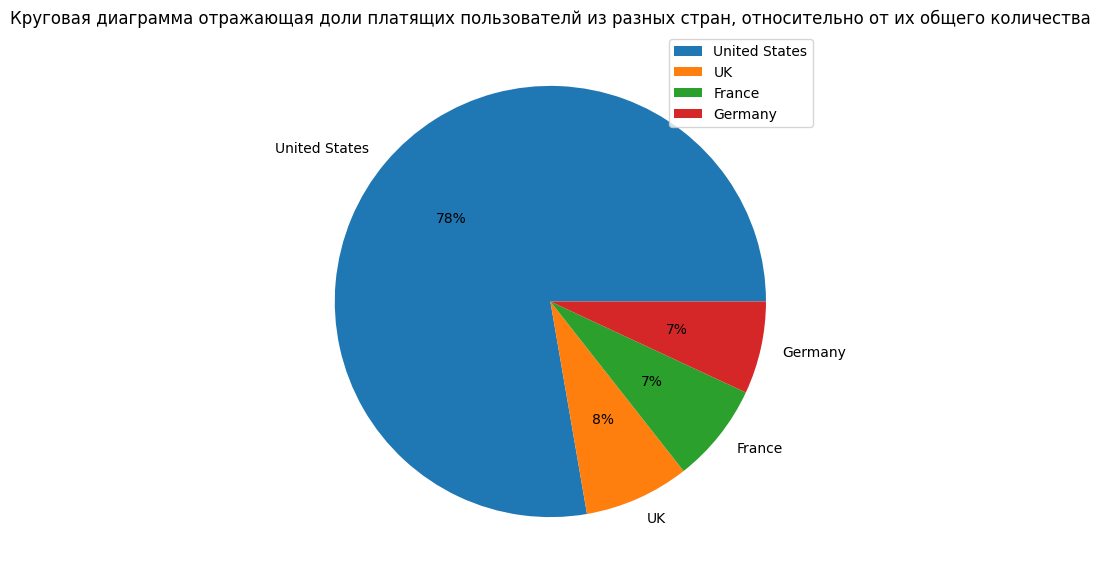

In [20]:
# Построю круговую диаграмму, для того, чтобы лучше увидеть доли
# платящих из разных стран

dp.plot(y='ratio_buyer',
        kind='pie',
        normalize=True,
        figsize=(7, 7),
       legend=True,
       fontsize=10,
        autopct='%1.0f%%')
plt.axis('off')
plt.title('Круговая диаграмма отражающая доли платящих пользователй из разных стран, относительно от их общего количества')

## Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства. 

In [21]:
# Построю таблдичку, в которой выведу количесвто пользователей
# и долю платящих пользователей для каждого устройства

dp2 = profiles.groupby('device')\
               .agg({'user_id': 'nunique', 'payer': 'mean'})\
               .sort_values(by='user_id', ascending=False)
    
dp2['ratio_user'] = dp2['user_id'] / dp2['user_id'].sum()

dp2['buyer'] = dp2['user_id'] * dp2['payer']
dp2['ratio_buyer'] = dp2['buyer'] / dp2['buyer'].sum()
dp2

,user_id,payer,ratio_user,buyer,ratio_buyer
device,,,,,
iPhone,54479,0.062079,0.363174,3382.0,0.380813
Android,35032,0.058518,0.233534,2050.0,0.230830
PC,30455,0.050468,0.203023,1537.0,0.173066
Mac,30042,0.063644,0.200269,1912.0,0.215291


Text(0.5, 1.0, 'Круговая диаграмма отражающая доли платящих пользователй из разных стран, относительно от их общего количества')

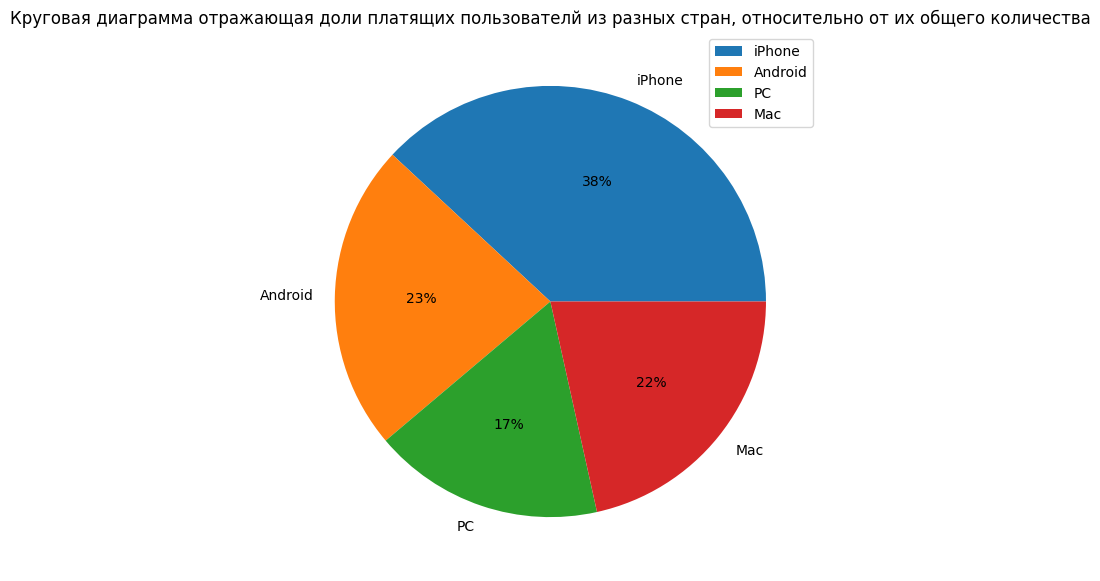

In [22]:
dp2.plot(y='ratio_buyer',
        kind='pie',
        normalize=True,
        figsize=(7, 7),
       legend=True,
       fontsize=10,
        autopct='%1.0f%%')
plt.axis('off')
plt.title('Круговая диаграмма отражающая доли платящих пользователй из разных стран, относительно от их общего количества')

## Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [23]:
dp3 = profiles.groupby('channel')\
              .agg({'user_id': 'nunique', 'payer': 'mean'})\
              .sort_values(by='user_id', ascending=False)

dp3['ratio_user'] = dp3['user_id'] / dp3['user_id'].sum()

dp3['buyer'] = dp3['user_id'] * dp3['payer']
dp3['ratio_buyer'] = dp3['buyer'] / dp3['buyer'].sum()
dp3

,user_id,payer,ratio_user,buyer,ratio_buyer
channel,,,,,
organic,56439,0.020553,0.376240,1160.0,0.130616
FaceBoom,29144,0.122049,0.194283,3557.0,0.400518
TipTop,19561,0.096007,0.130400,1878.0,0.211463
OppleCreativeMedia,8605,0.027077,0.057364,233.0,0.026236
LeapBob,8553,0.030633,0.057017,262.0,0.029501
WahooNetBanner,8553,0.052964,0.057017,453.0,0.051008
RocketSuperAds,4448,0.079137,0.029652,352.0,0.039635
MediaTornado,4364,0.035747,0.029092,156.0,0.017566
YRabbit,4312,0.038265,0.028745,165.0,0.018579


In [24]:
# Подготовлю два датафрейма: первый с разбивкой пользователей по каналам,
# а второй с разбивкой платящих пользователей по каналам

dpp = dp3[['user_id', 'ratio_user']]
ddp = dp3[['buyer', 'ratio_buyer']]

display(dpp)
display(ddp)

,user_id,ratio_user
channel,,
organic,56439,0.376240
FaceBoom,29144,0.194283
TipTop,19561,0.130400
OppleCreativeMedia,8605,0.057364
LeapBob,8553,0.057017
WahooNetBanner,8553,0.057017
RocketSuperAds,4448,0.029652
MediaTornado,4364,0.029092
YRabbit,4312,0.028745


,buyer,ratio_buyer
channel,,
organic,1160.0,0.130616
FaceBoom,3557.0,0.400518
TipTop,1878.0,0.211463
OppleCreativeMedia,233.0,0.026236
LeapBob,262.0,0.029501
WahooNetBanner,453.0,0.051008
RocketSuperAds,352.0,0.039635
MediaTornado,156.0,0.017566
YRabbit,165.0,0.018579


Text(0.5, 1.0, 'Круговая диаграмма с разбивкой пользовоталейпо каналам')

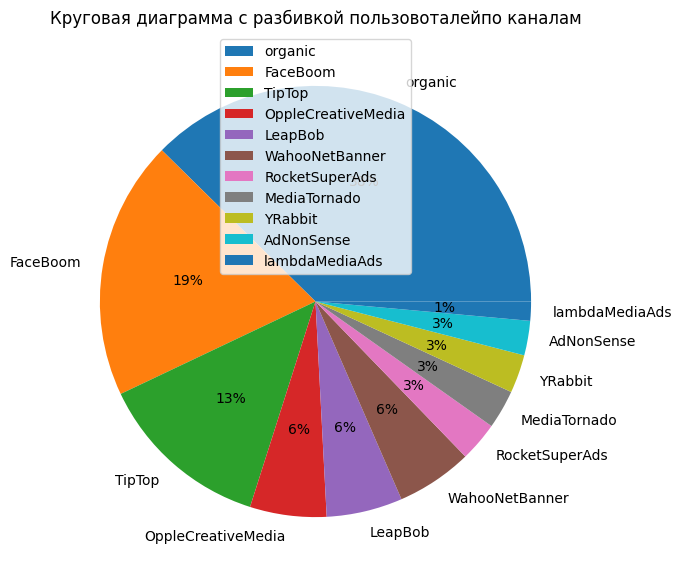

In [25]:
dpp.plot(y='ratio_user',
        kind='pie',
        normalize=True,
        figsize=(7, 7),
       legend=True,
       fontsize=10,
        autopct='%1.0f%%')
plt.axis('off')
plt.title('Круговая диаграмма с разбивкой пользовоталейпо каналам')

Text(0.5, 1.0, 'Круговая диаграмма с разбивкой платящих пользовоталейпо каналам')

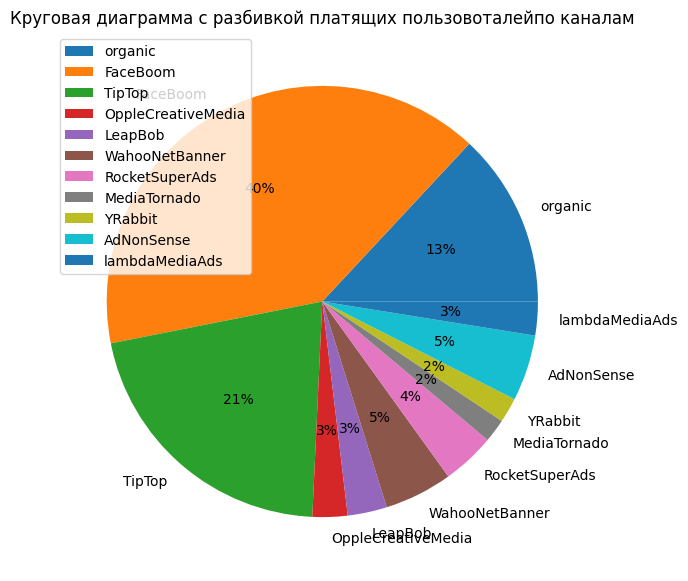

In [26]:
ddp.plot(y='ratio_buyer',
        kind='pie',
        normalize=True,
        figsize=(7, 7),
       legend=True,
       fontsize=10,
        autopct='%1.0f%%')
plt.axis('off')
plt.title('Круговая диаграмма с разбивкой платящих пользовоталейпо каналам')

## Шаг 3 выполнен.

### Подводим итоги:

- Минимальная дата привлечения пользователя = 2019-05-01
- Максиимальная дата привлечения пользователя = 2019-10-27


- Всего стран рассматривается четыре: США, Великобритания, Франция и Германия.
- По итогу анализа можно сделать выводы о том, что на первом месте по приросту пользователей в приложение стоит США, также данная страна имеет наибольшую долю платящих пользователей


- Преимущественно пользователи пользуются iPhone и Android. Этими же устройствами предпочитают пользоваться платящие пользователи.

 
- Могу выделить четыре основных канала с которых к нам идут пользователи, это: organic, FaceBoom, TipTop, и OppleCreativeMedia
- Практически половину платящих пользователей приходиться на канал FaceBoom, TipTop и Organic. Именно им я бы придал наибольшее внимание по вложениям.


# Шаг 4. Маркетинг

## Посчитайте общую сумму расходов на маркетинг.

In [27]:
print('Потраченно на рекламу:', np.ceil(costs['costs'].sum()))

Потраченно на рекламу: 105498.0


## Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

In [28]:
costs_channel = costs.groupby(['channel'])[['costs']]\
                   .sum()\
                   .sort_values(ascending=False, by='costs')
costs_channel = costs_channel.merge(costs_channel, on=['channel', 'costs'], how='left')\
                             .reset_index()
costs_channel['ratio_%'] = (costs_channel['costs'] / costs_channel['costs'].sum()) * 100
display(costs_channel)

,channel,costs,ratio_%
0,TipTop,54751.30,51.898295
1,FaceBoom,32445.60,30.754910
2,WahooNetBanner,5151.00,4.882589
3,AdNonSense,3911.25,3.707441
4,OppleCreativeMedia,2151.25,2.039152
5,RocketSuperAds,1833.00,1.737485
6,LeapBob,1797.60,1.703930
7,lambdaMediaAds,1557.60,1.476436
8,MediaTornado,954.48,0.904744
9,YRabbit,944.22,0.895018


#### Самый затратный источник привлечения пользователей - TipTop. Он охватывает более половины от общей суммы затратю

## Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.

C:\Users\arsen\AppData\Local\Temp\ipykernel_17180\461428629.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  costs['week'] = costs['dt'].astype('datetime64').dt.week


Text(0.5, 1.0, 'Изменение стоимости рекламы по месяцам с разбивкой по рекламным каналам')

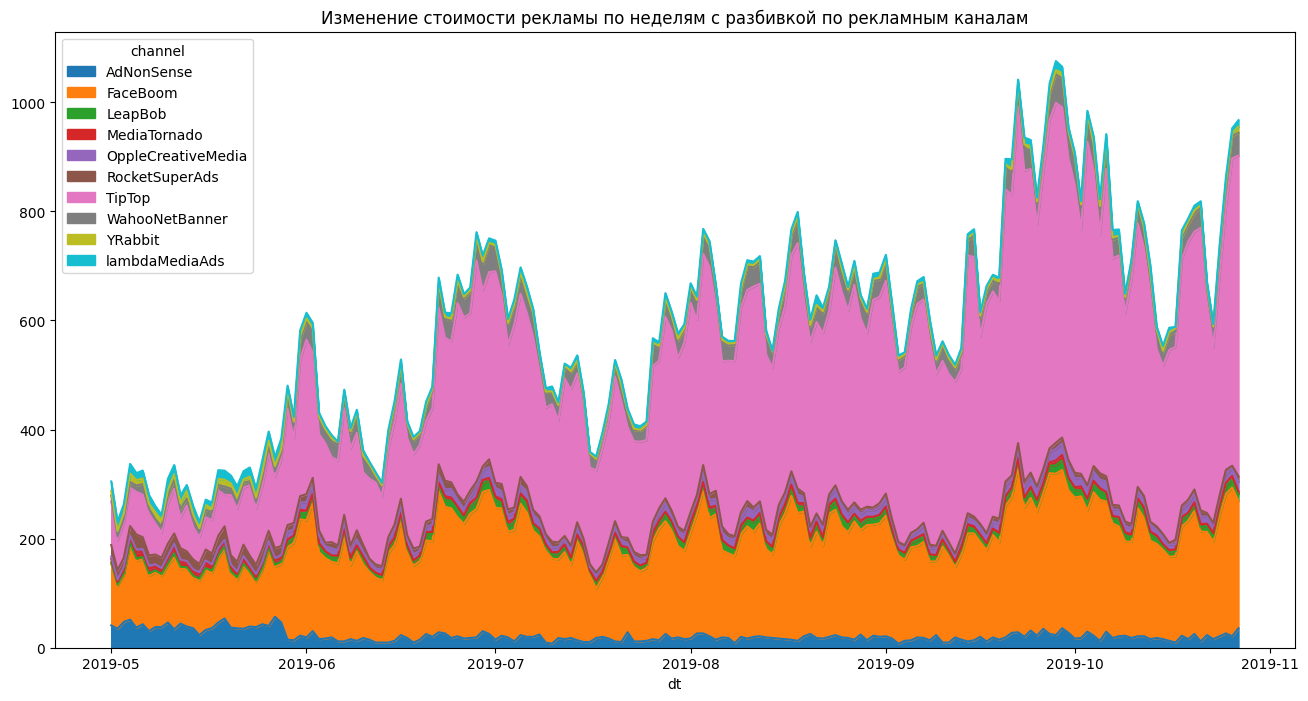

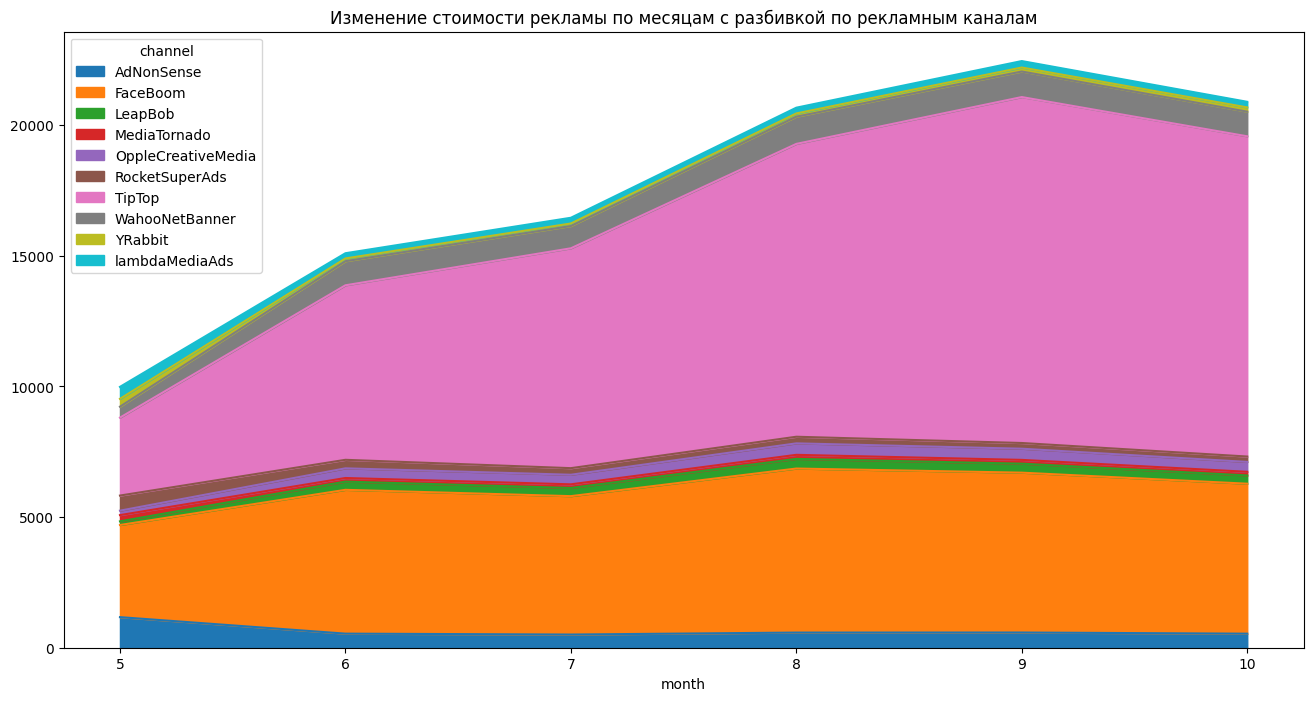

In [29]:
costs['week'] = costs['dt'].astype('datetime64').dt.week
costs['month'] = costs['dt'].astype('datetime64').dt.month

costs.pivot_table(index=['dt'], values='costs', columns='channel', aggfunc='sum').plot.area(figsize=(16,8))
plt.title('Изменение стоимости рекламы по неделям с разбивкой по рекламным каналам')
costs.pivot_table(index=['month'], values='costs', columns='channel', aggfunc='sum').plot.area(figsize=(16,8))
plt.title('Изменение стоимости рекламы по месяцам с разбивкой по рекламным каналам')

### Стоимость рекламы в таких источниках, как TipTop, LambdaMediaAds, WahooNetBanner и и YRabbit неприрывно расет в долгосрочном периоде, в то время как остальные стабильно держаться либо с минимальными отклонениями.

## Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

In [30]:
# Удаляю органический трафик
profiles = profiles.query('channel != "organic"')

In [31]:
# среднее знеачение CAC 
print(profiles['acquisition_cost'].mean())

1.1274813239427588


In [32]:
profiles1 = profiles.groupby('channel')[['acquisition_cost']]\
                    .mean()\
                    .sort_values(ascending=False, by='acquisition_cost')

profiles1 = profiles1.merge(profiles1, on=['channel', 'acquisition_cost'], how='left')\
                     .reset_index()

profiles1['acquisition_cost_%'] = (profiles1['acquisition_cost'] / profiles1['acquisition_cost'].sum()) * 100
display(profiles1)

,channel,acquisition_cost,acquisition_cost_%
0,TipTop,2.799003,37.036838
1,FaceBoom,1.113286,14.731168
2,AdNonSense,1.008054,13.338727
3,lambdaMediaAds,0.724802,9.590694
4,WahooNetBanner,0.602245,7.968996
5,RocketSuperAds,0.412095,5.452908
6,OppleCreativeMedia,0.250000,3.308038
7,YRabbit,0.218975,2.897510
8,MediaTornado,0.218717,2.894094
9,LeapBob,0.210172,2.781026


### Выводы по данному Шагу.
- Днеге потраченно на маркетинг: 105498.
- Большего всего было затрат в каналы TipTop и FaceBoom (51.9% и 33.8%). Возможно иемнно поэтому они попали в топ-4 канала из которых идет трафик пользователей.
- Расходы на каналы AdNoneSense и FaceBoom по месяца и неделям держит планку выше всех. До 9 месяца график активно рос, но потом немного упал, думаю это норма.

# Шаг 5. Оцените окупаемость рекламы

### Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [33]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа 
horizon_days = 14  # горизонт анализа

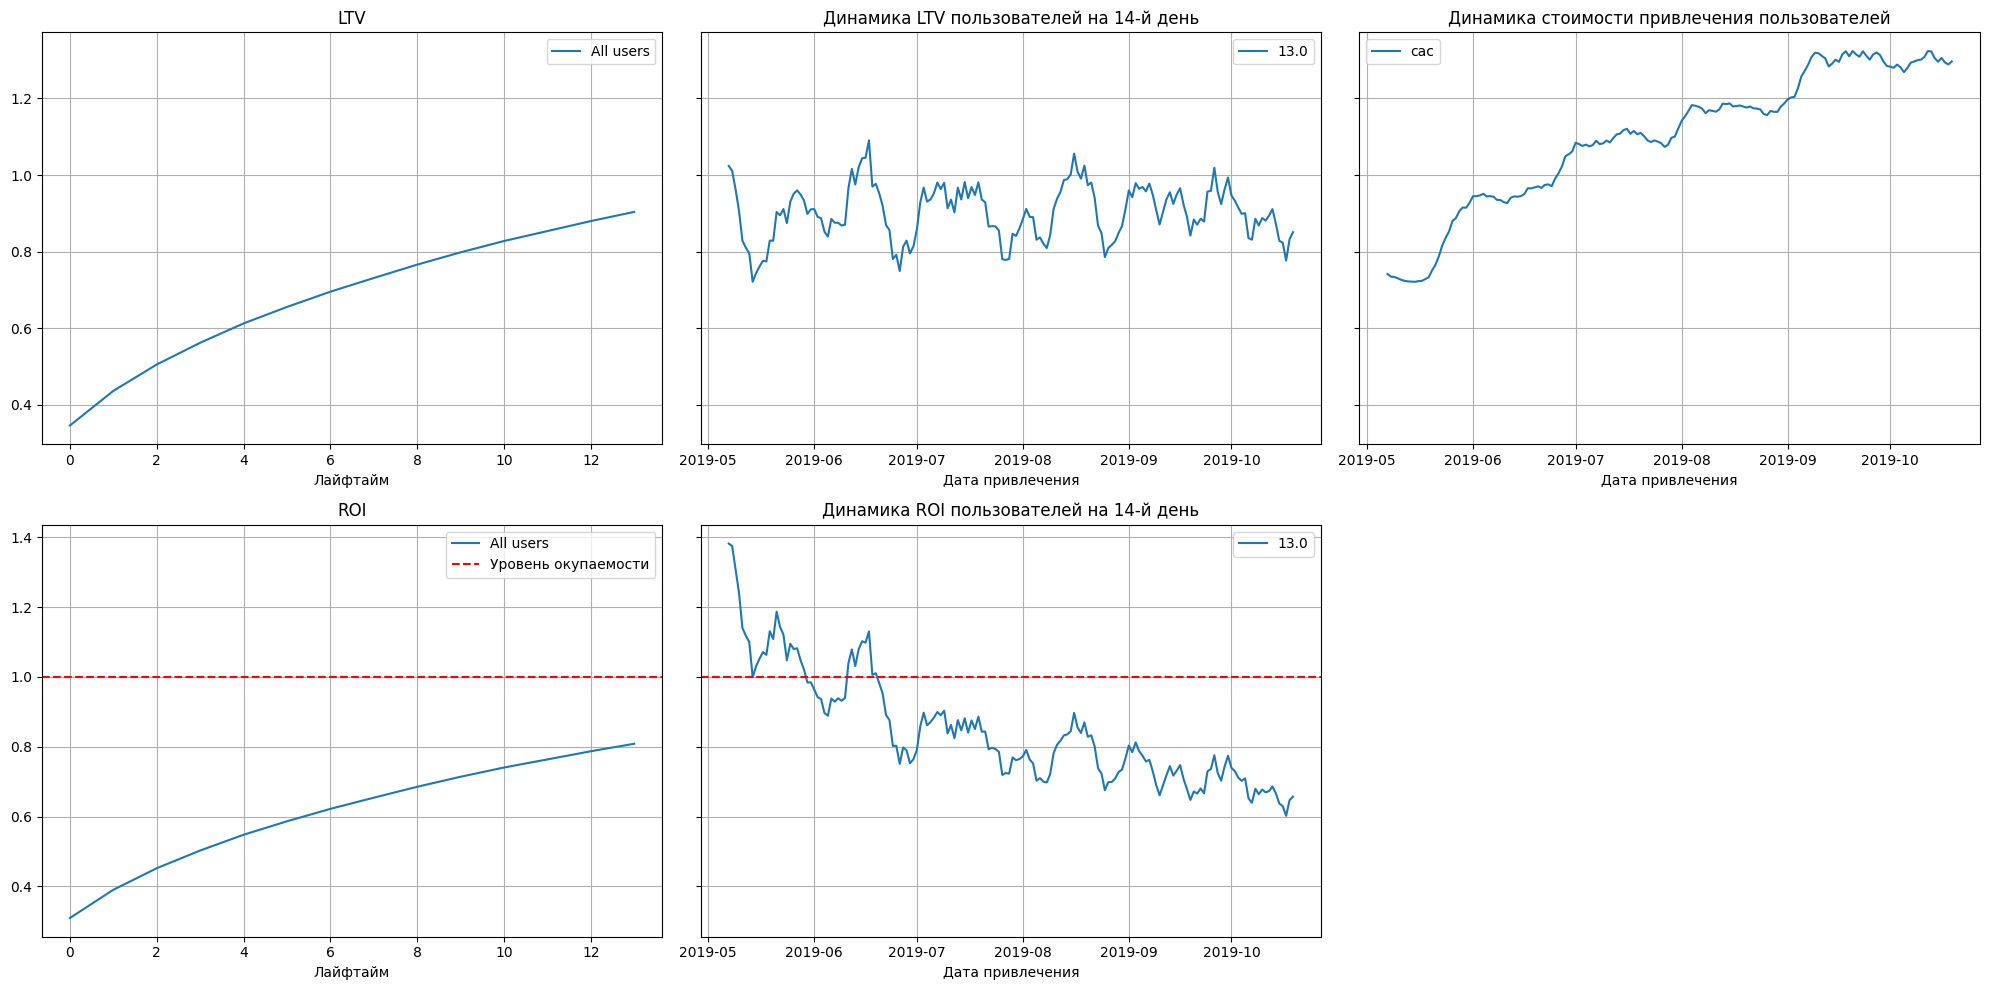

In [34]:
# считаю и визуализирую LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

#### Вывод по графикам
- За вбыранным промежуток времени реклама не окупается. ROI на графике не пересекает уровень окупаемости. Рост графика есть но его недостаточно.
- Стоимость привлеченного пользователя растет, а это влияет на ROI, то есть при продолении роста третьего графика, вырастет и ROI.
- График LTV растет, что тоже может порадовать, пожизненная ценность поднимается.

### Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.

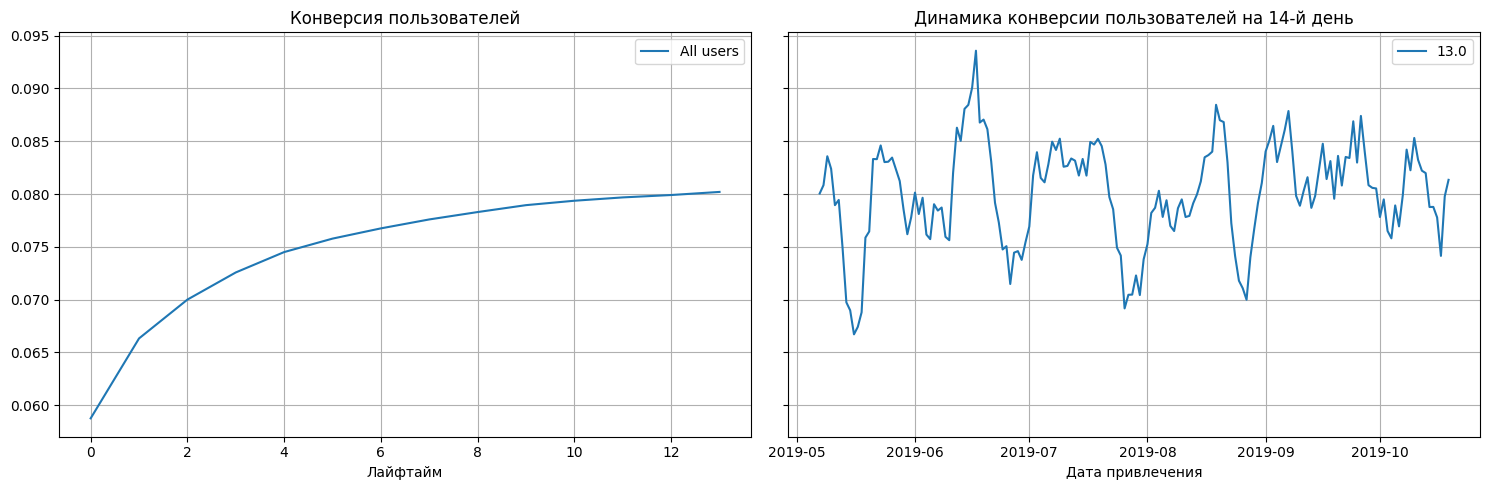

In [35]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

#### Судя по графикам конверсия пользователей растет и с ней все хорошо

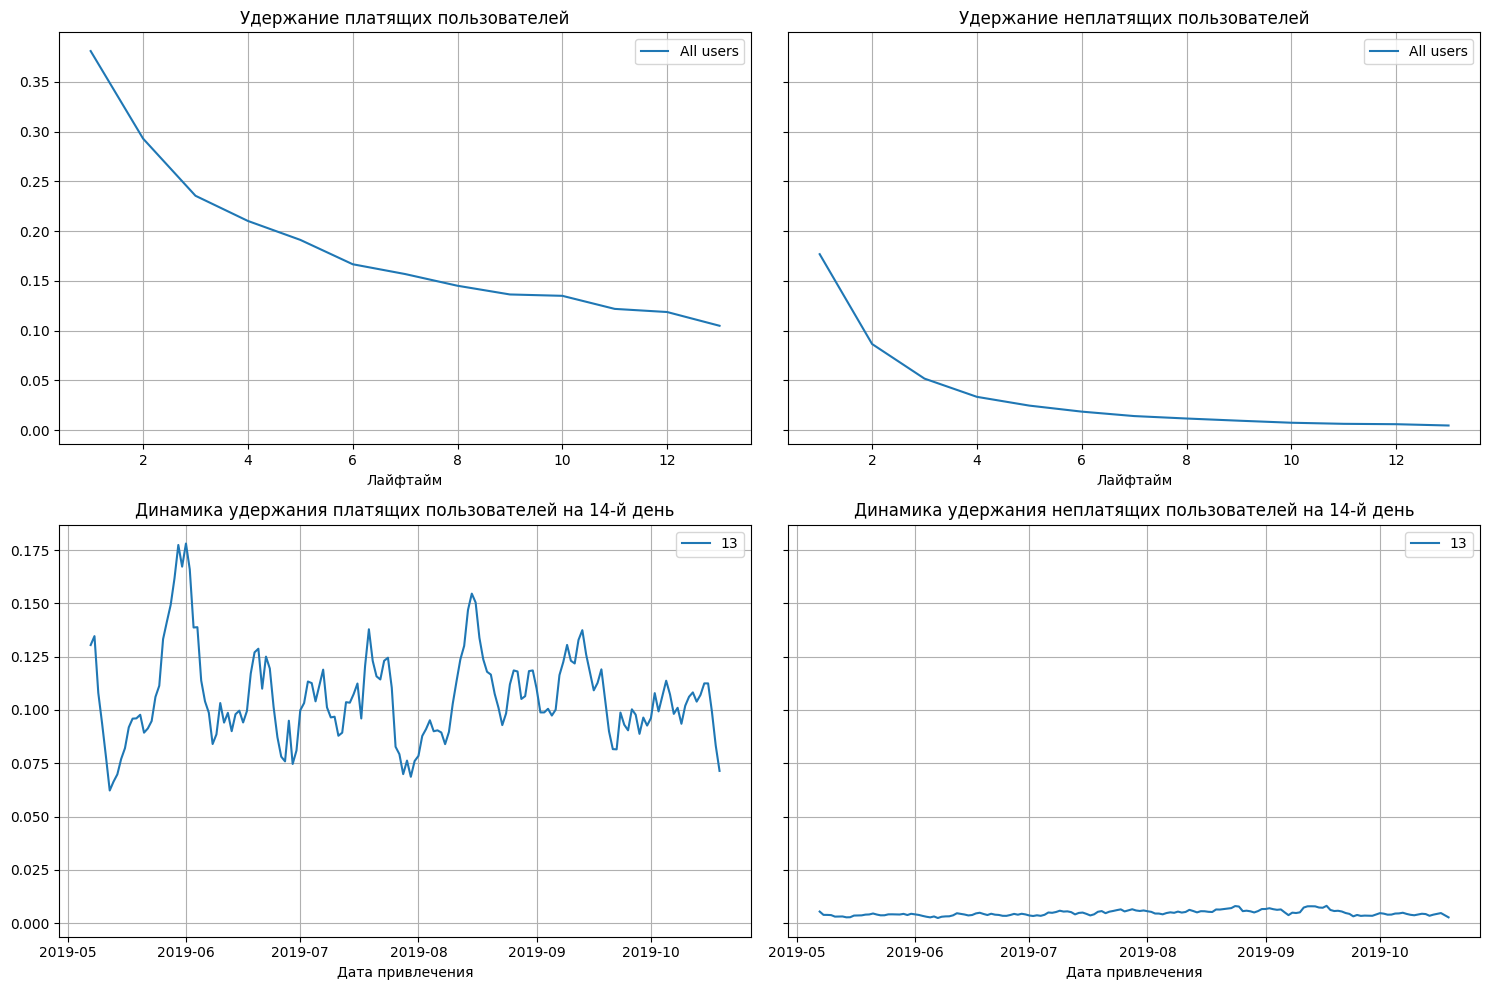

In [36]:
retention_raw, retention_grouped, retention_history = get_retention(
profiles, visits, observation_date, horizon_days)

plot_retention(retention_grouped, retention_history, horizon_days) 

####  Состояние удержания платящих пользователей крайне плачевно, за 14 дней графки приблизительно упал на 0.27.

## Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

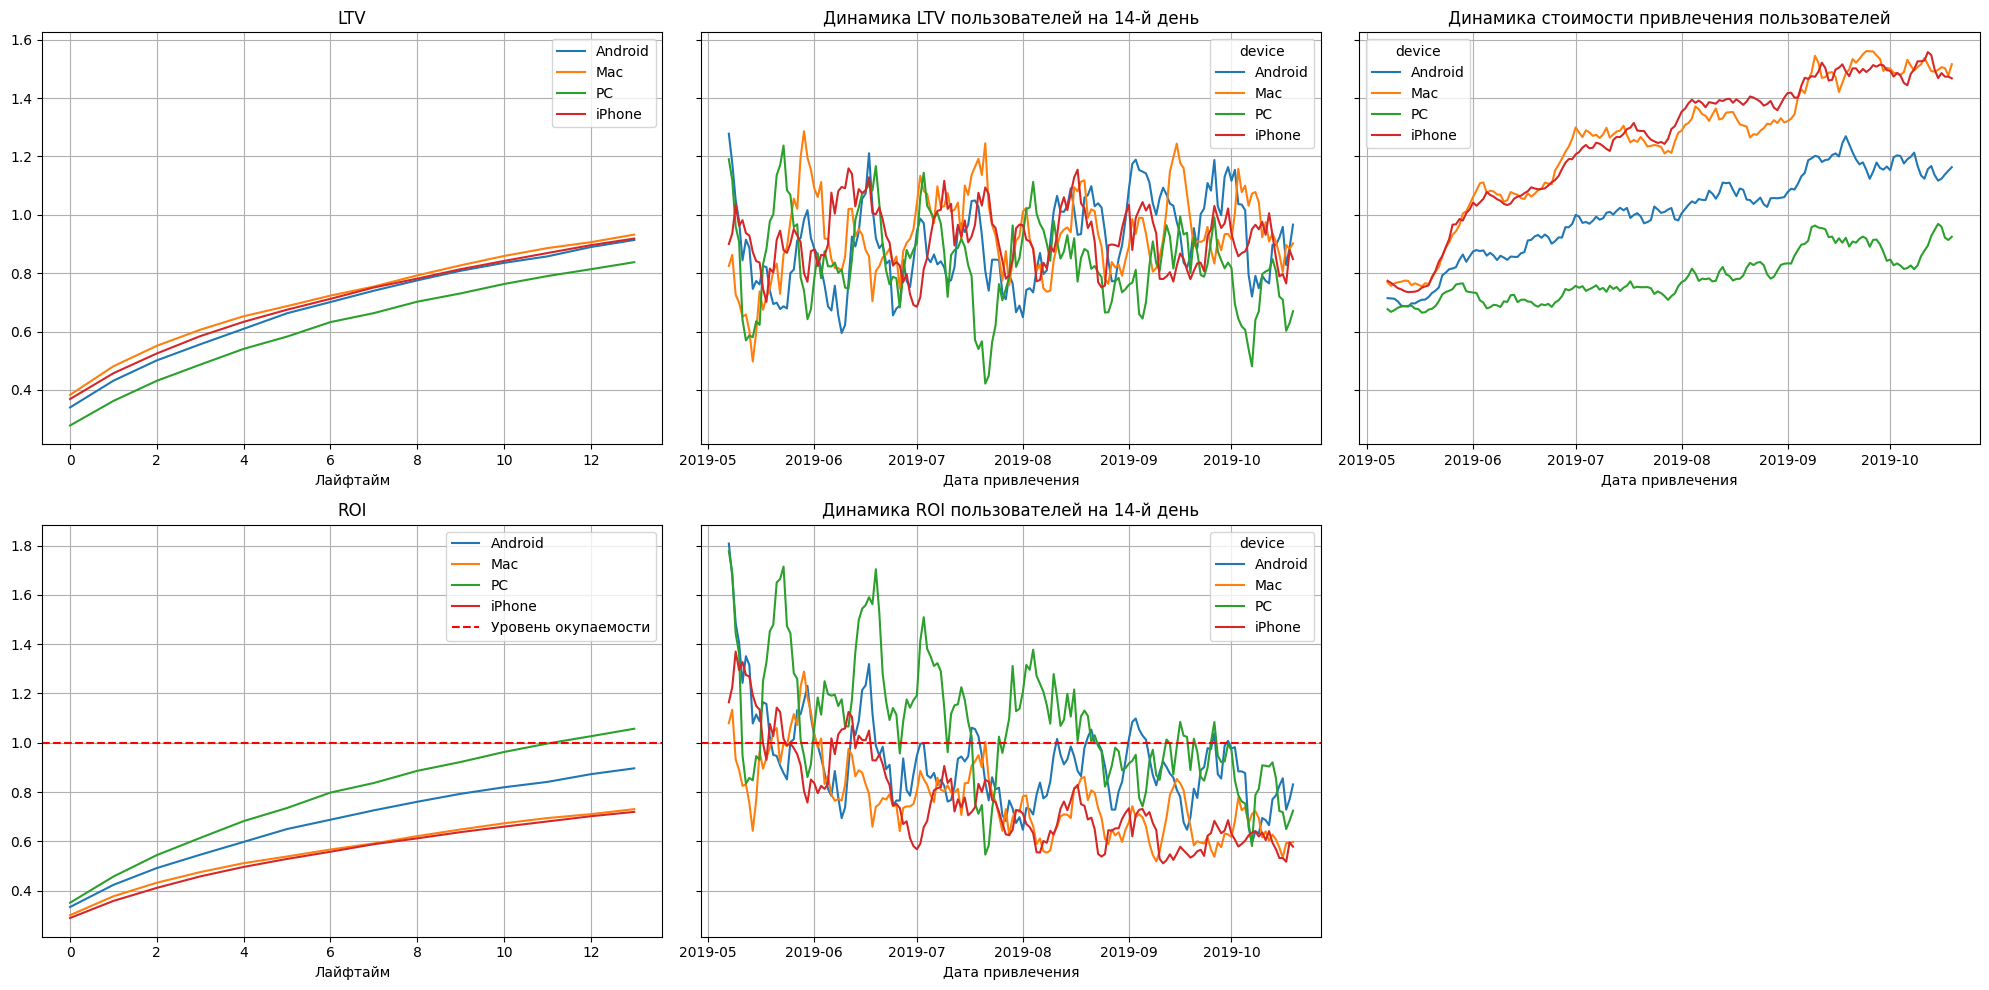

In [37]:
# считаю LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['device']
)


# строю графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

### По графику LTV видно, что пожизненная ценность пользователей Android, Mac и iPhone растет и это радует, что касается PC то график также растет, но отстает от остальных. Наибольшую стоимость привлечения у нас имеет Mac и iPhone, график заметно вырос по отношению конечной точки к первоначальной. Устройства Android и PC растут с меньшей активностью. На графику ROI можно заметить, что единсвтенная платформа которая преодолевает уровень окупаемости - PC, и жто несмоттря на то, что PC имеет наименьшую стоимость привлечения. За PC следует Android, хороший рост графика, при больших вложениях я думаю он также достигнет уровня окупаемости. В отличии от этих двух платформ iPhone и Mac отстают и не достигают уровня окупаемости

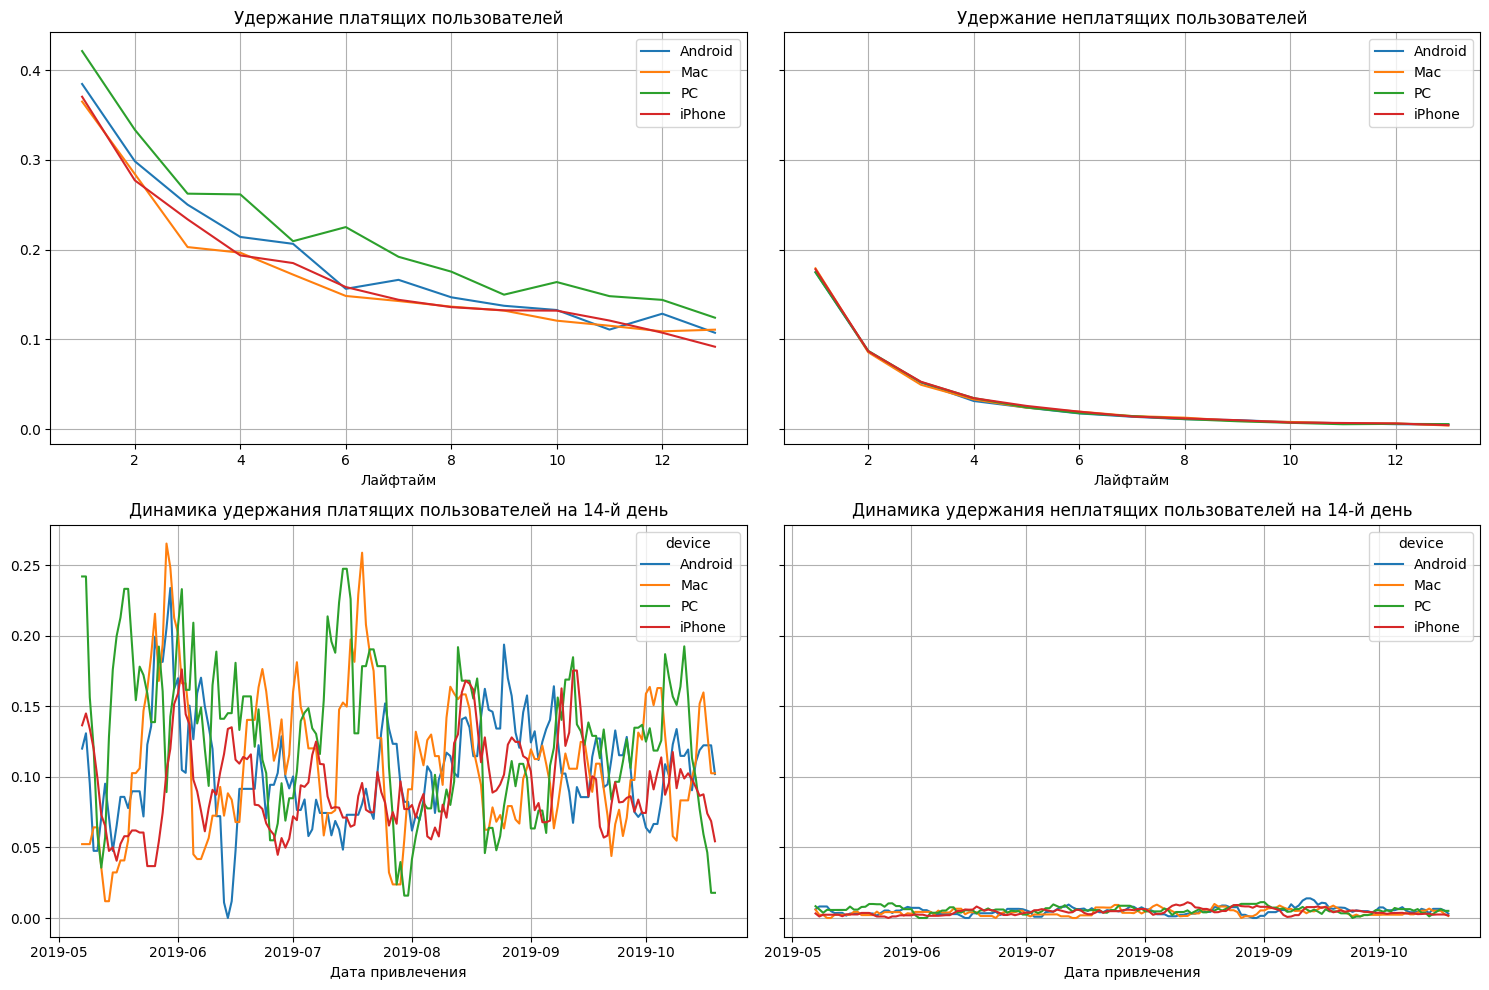

In [38]:
retention_raw, retention_grouped, retention_history = get_retention(
profiles, visits, observation_date, horizon_days, dimensions=['device']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

#### Состояние графиков оставляет желать лучшего. Для всех платформ удержание платящих пользователей падает. Если компания не предпримет какие то меры, например введение глобального обновления или что то подобное, то есть то, что возможно спасет приложение от потери потенциальных и уже оставшихся клиентов.

## Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

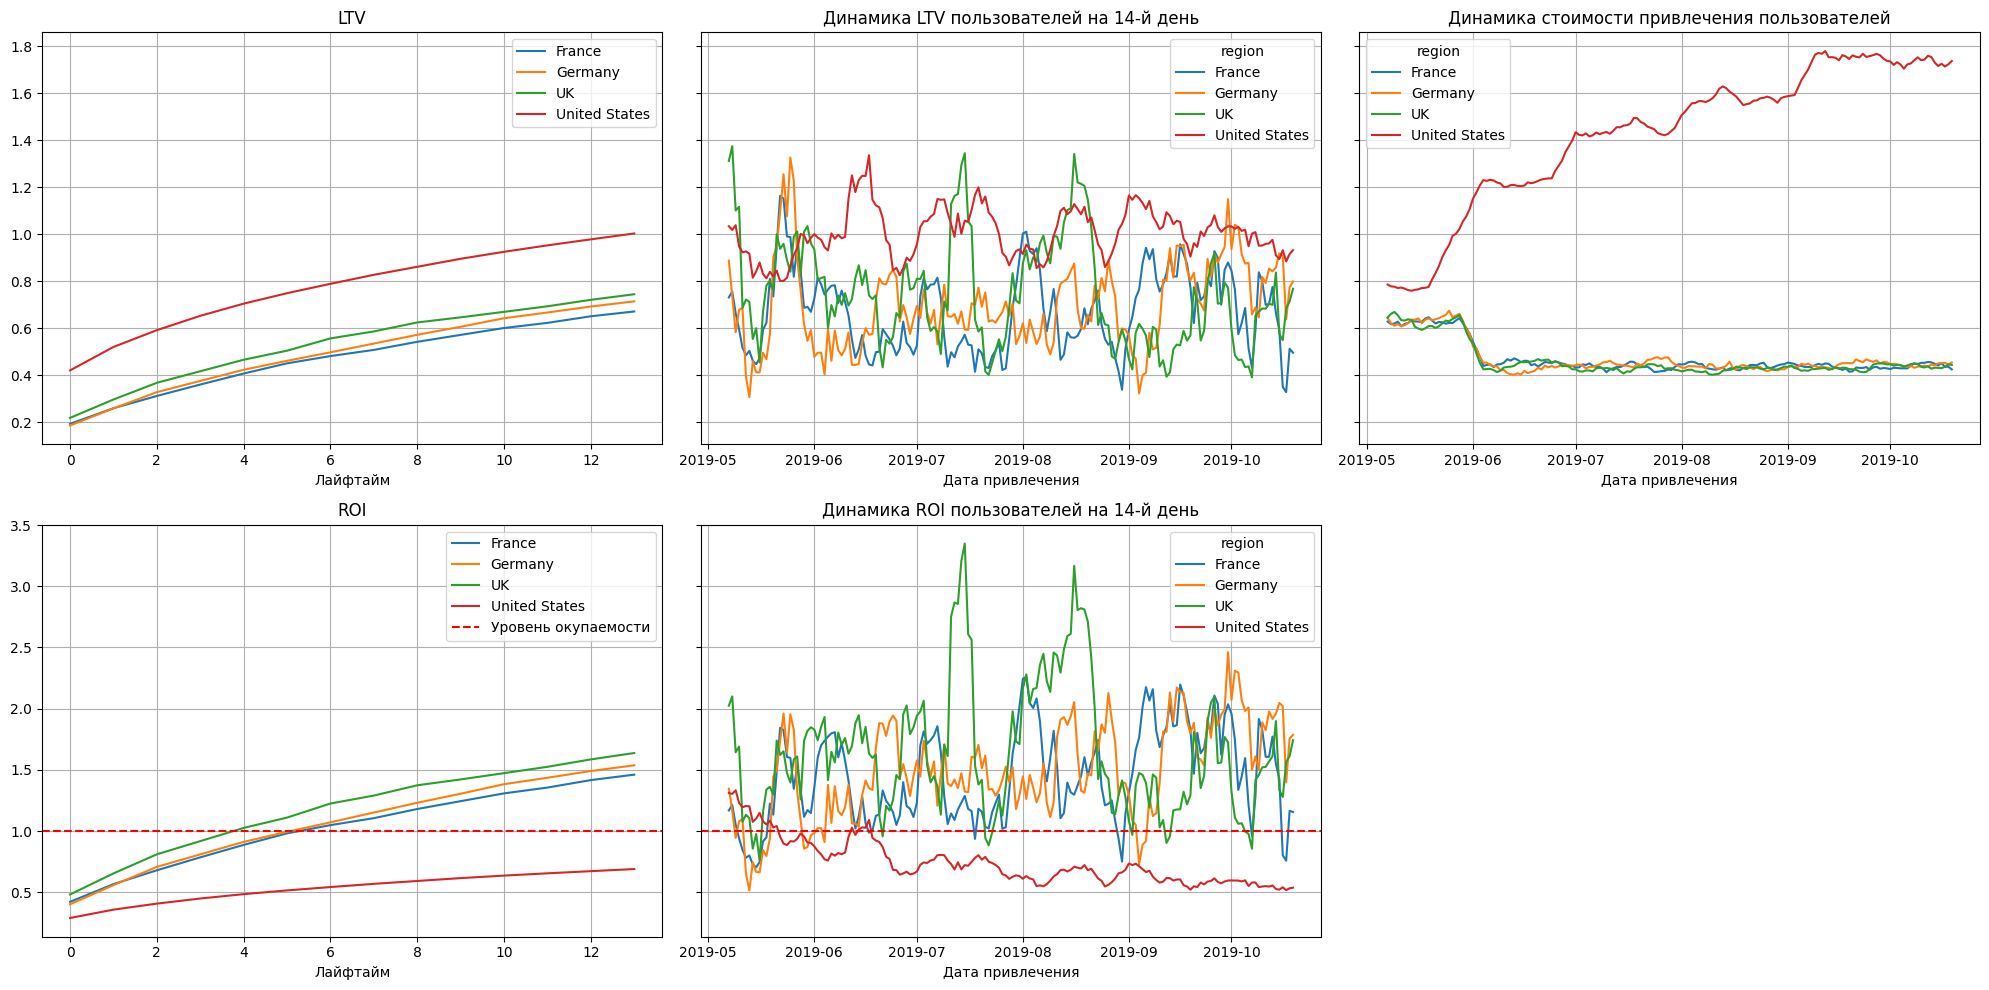

In [39]:
# считаю LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['region']
)


# строю графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

#### Пожизненная ценность пользователей из США сильно отличается на фоне остальных

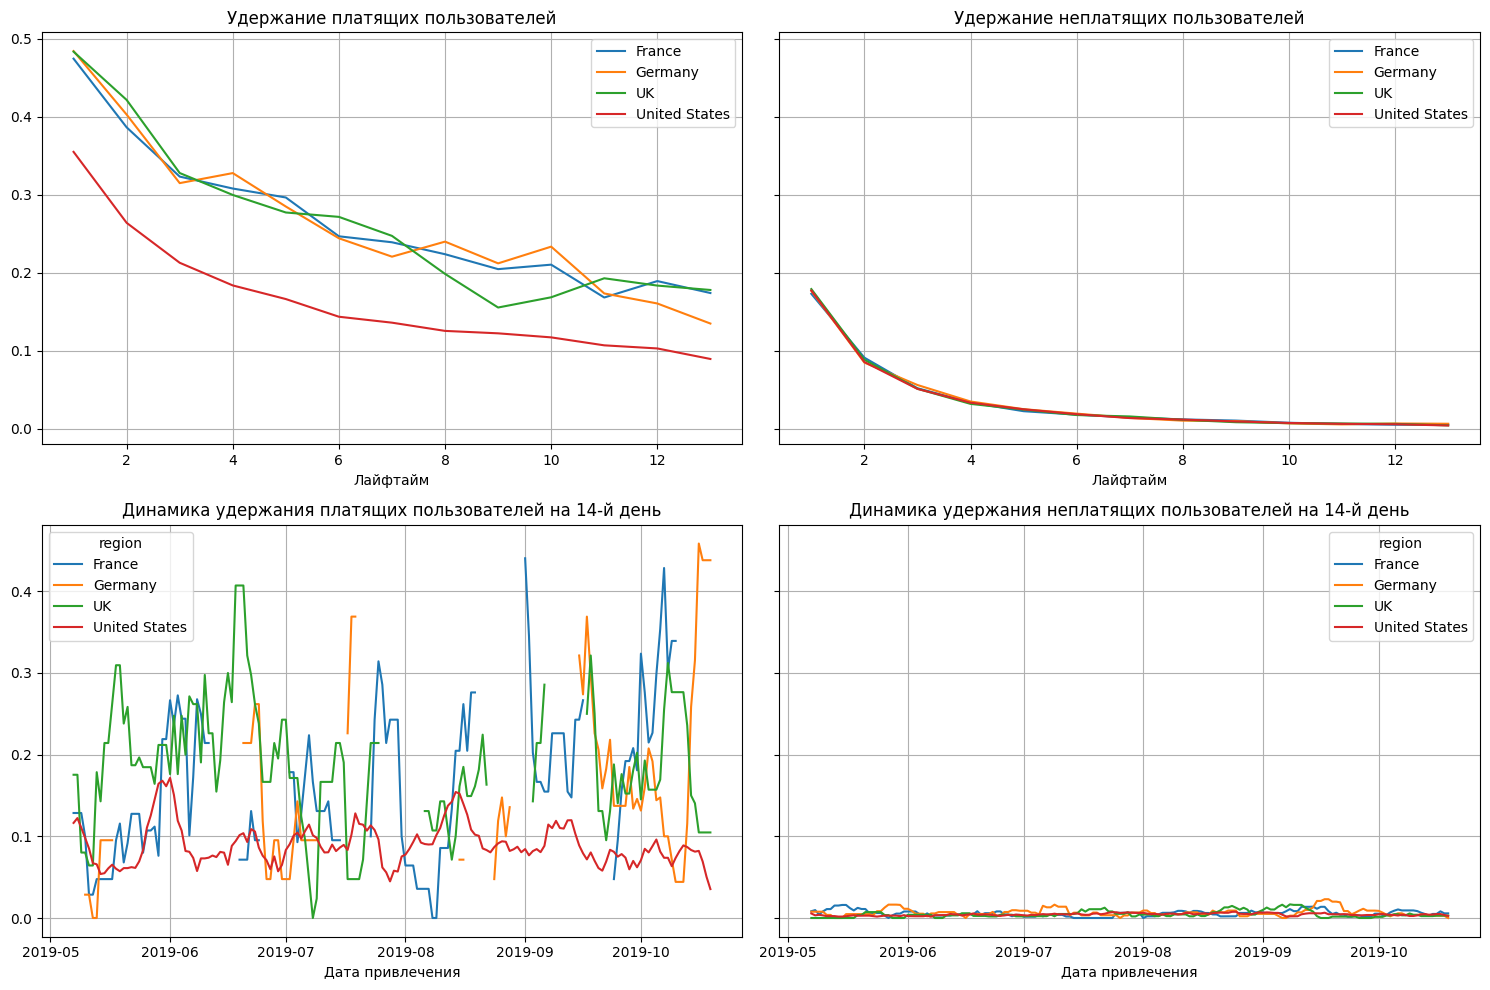

In [40]:
# Посмотрю на удержание пользователей
retention_raw, retention_grouped, retention_history = get_retention(
profiles, visits, observation_date, horizon_days, dimensions=['region']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

#### Компания вкладывает много ресурсов на фоне остальных стран в США, это видно на графике ранее, но при этом удержание платящих пользователей крайне плачевно. Пользователи из США даже не пересекают уровень окупаемости при таких вложениях. Пользователи из США опять же таки при больших вложениях не достигают уровня окупаемостию

## Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

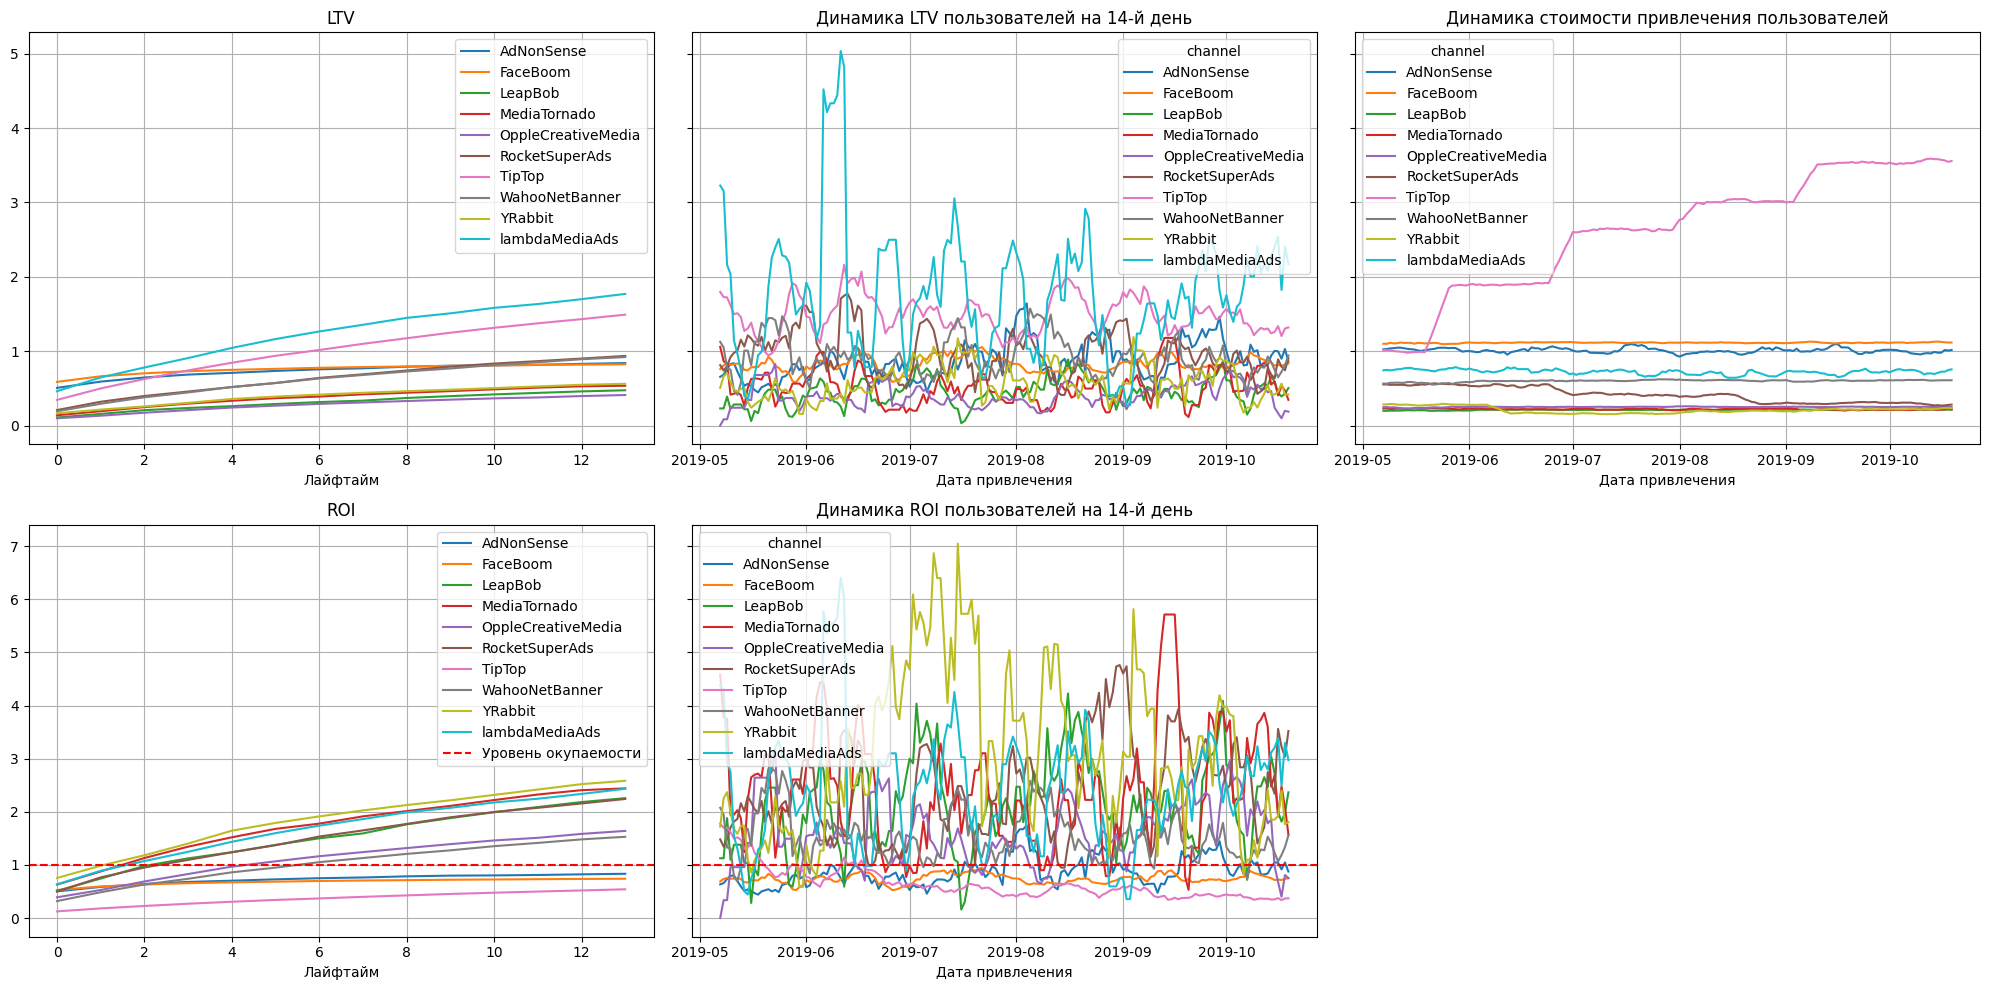

In [41]:
# считаю LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['channel']
)


# строю графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

- Можно выделить семь компания: YRabbit, MediaTornado, lambdaMediaAds, RocketSuperAds, OppleCreativeMedia, LeapBob и WahooNetBanner. У этих каналов динамика стоимости привличения пользователей стабильна, а значение ROI выше уровеня окупаемости, то есть пользователи, пришедшие с этих каналов, приносят больше чем на них потратили для привличения
- В случае с TipTop, то тут динамика привлечения довольно таки сильно растет, особенно на фоне остальных, но значение ROI не доходит до уровня окупаемости.
- Канал AdNoneSense и FaceBoom немного не дотягивают до уровня окупаемости, думаю если немного увеличить вложения в данные каналы, то они смогут пересечь данный уровень

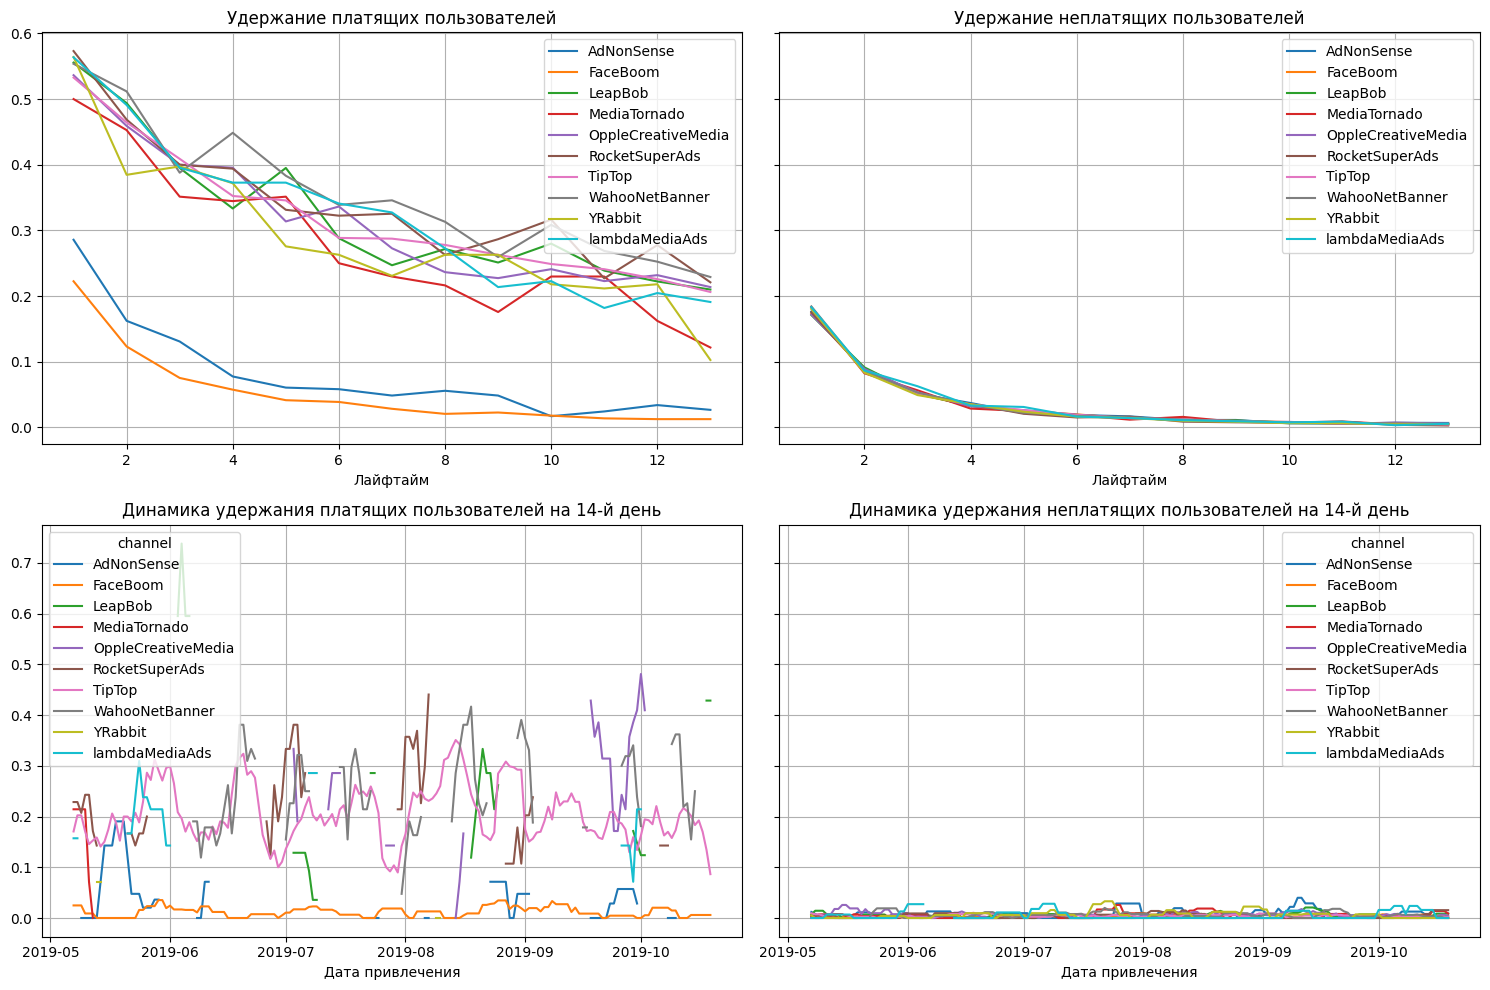

In [42]:
# Взглянем на удержание
retention_raw, retention_grouped, retention_history = get_retention(
profiles, visits, observation_date, horizon_days, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

- пользователи FaceBoom и AdNonSense наиболее подвержены к плохому удержанию, возможно пользователи из данных каналов привоечения не интересуются тематикой приложения

In [43]:
# ЧТобы выяснить причину по которой пользователи из канала TipTop, AdNonSense и FaceBoom не окупаются,
# я узнаю с каких устройств они переходятв приложение
tiptop = visits[visits['channel'] == 'TipTop']
display(tiptop['device'].value_counts())

faceboom = visits[visits['channel'] == 'FaceBoom']
display(faceboom['device'].value_counts())

adns = visits[visits['channel'] == 'AdNonSense']
display(adns['device'].value_counts())

iPhone     24608
Mac        13153
Android    11424
PC          5609
Name: device, dtype: int64

iPhone     21866
Mac        12262
Android     9793
PC          5101
Name: device, dtype: int64

PC         2760
Android    1993
iPhone     1430
Mac         708
Name: device, dtype: int64

## Ответьте на такие вопросы:

### Окупается ли реклама, направленная на привлечение пользователей в целом?

За выбранный промежуток времени реклама не окупается. Показатели ROI не дотягиваются до уровня окупаемости, но стремление к этому есть.
Показатели CAC стабильно растут, а это значит, что скорее всего в дальнейшем показатели ROI также перейдут уровень окупаемости.

### Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?

- Устройства. Рассматривая устройства, могу сказать, что все устройства мало отличаются друг от друга по графикам, пользователи PC немного превосходят в плане удержания остальных. Также PC единсвтенное устройство, которые пересекает линию уровень окупаемости. Пожизненная ценность пользователей Mac, Android и iPhone намного выше чем у PC. 
- Страны. Пользователи из США сильно отличаются на фоне осталных. Также больтше всего пользователей, как платящих, так и непоатящих из США. На данную странну обращают большее внимание в плане привлечения, но именно пользователей США сложнее всех удержать. Я думаю, что это одна из ошибок компании. Они уделяют много внимания  и ресурсов пользователям из США, хотя остальные пользоватлеи покаывают лучший результат в рамках удержания, хоть графики и падают. Думаю стоит обратить внимание на другие странны, хотя бы в рамках эксперимента.
- Каналы привлечения. Можно выделить семь компания: YRabbit, MediaTornado, lambdaMediaAds, RocketSuperAds, OppleCreativeMedia, LeapBob и WahooNetBanner. У этих каналов динамика стоимости привличения пользователей стабильна, а значение ROI выше уровеня окупаемости, то есть пользователи, пришедшие с этих каналов, приносят больше чем на них потратили для привличения. В случае с TipTop, то тут динамика привлечения довольно таки сильно растет, особенно на фоне остальных, но значение ROI не доходит до уровня окупаемости.

# Шаг 6. Напишите выводы

По итогу анализа могу сделать следующие выводыю
- Одна из главных проблем по которой компания терпит убытки - это плохое удержание платящих пользователей. На графиках "окупаемость рекламы с разбивкой по странам" можно увидеть, что пожизненная ценность пользователей из США очень хорошая, она почти в два раза превосходит стран Европы. По графику вложения я вижу, что самая крупнозатратная страна это США. США является третьей самой крупной странной в мире по численности населения, а это говорит о том, что рынок США очень крупный и есть возможность привлечь большое количество новых пльзователей. Взглянув на график ROI, можно заметиь, что даже при огрномных вложениях на фоне стран Европы, США не пересекает уровная окупаемости. Обращая внимание на график удержания платящих пользователей, не может не разочароовывать тот факт, что самое ужасное удержание приходится на США. По графику Динамики также есть спад почти в половину от первоночальной точки.
- По графику LTV видно, что пожизненная ценность пользователей Android, Mac и iPhone растет и это радует, что касается PC то график также растет, но отстает от остальных. Наибольшую стоимость привлечения у нас имеет Mac и iPhone, график заметно вырос по отношению конечной точки к первоначальной. Устройства Android и PC растут с меньшей активностью. На графику ROI можно заметить, что единсвтенная платформа которая преодолевает уровень окупаемости - PC, и жто несмоттря на то, что PC имеет наименьшую стоимость привлечения. За PC следует Android, хороший рост графика, при больших вложениях я думаю он также достигнет уровня окупаемости. В отличии от этих двух платформ iPhone и Mac отстают и не достигают уровня окупаемости.
- Можно выделить семь компания: YRabbit, MediaTornado, lambdaMediaAds, RocketSuperAds, OppleCreativeMedia, LeapBob и WahooNetBanner. У этих каналов динамика стоимости привличения пользователей стабильна, а значение ROI выше уровеня окупаемости, то есть пользователи, пришедшие с этих каналов, приносят больше чем на них потратили для привличения
- На канал привлечения TipTop приходится очень много вложений, и это учитывая тот факт, что график окупаемости говорит мне о том, что это TipTop не дает положителных результатов, то есть не пересекает уровень окупаемости. После того, как я взглянул на устройства с которых переходят в приложение из канала TipTop, AdNonSense и FaceBoom я понял, что самое популярное устройство это iPhone. Возможно проблема заключается именно в этом. Приложение плохо оптимизированно под устройсвто или его попросту обходят конкуренты в плане дизайна, функционала илди даже простоты использования.
привлечь бюджет развития TipTop к каналам FaceBoom и AdNoneSense, то я думаю их получилось бы вывезти над уровнем окупаемости.

## Рекомендации

- Первая рекомендация - это поработать над приложение для устройства iPhone. Пользователи из каналов TipTop и FaceBoom плохо уживаются в приложении. Стоит проверить приложение, возможно переработать его, заментиь функционал, сделать редизайн, поработать над скоростью отклика приложения, сделать его простым в использовании. Если в приложении много рекламы, то скоратить ее количествоо, потому что многие сталкиваются с проблемой, когда скачиваешь приложение на iPhone тебя встречает море рекламы, из-за чего приходится либо выключать интрнет на телефоне или попросту удалять приложение из-за его неудобства.
- Для пользователей iPhone сделать скидки, то есть при выполнении какого то небольшого задания получить 30 дней подписки Pro+ бесплатно.
- На время проведения технических работ в приложении для iPhone стоит закрыть рекламные компании и направить ресурсы на привлечение пользователей для других устройств или каналов. Например стоит обратить внимание на каналы RocketSuperAds и WahooNetBanner. У данных каналов лучший показателй по удержанию, можно сказать, что аудитория данного канала схожа с интересами тематики приложения нашего приложения.
- Возможно цена подписки на Pro+ версию высокая, 
- Также не стоит забывать про конкурентов. Конкуренты это не враги, это друзья. Думаю именно они от части служат хорошим механизмом развития будто какой-либо бизнесс или в данной ситуации приложение. Проанализировать плюсы и минусы нескольких похожий приложений, где приемущество на нашей стороне, в чем мы хороши, обратить внимание на слабые стороны.